In [324]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from  sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from  sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import model_selection
import plotly.express as px


from sklearn.ensemble import RandomForestRegressor

In [325]:
!pip install rfpimp
import rfpimp

In [326]:
df = pd.read_csv("../data/clean/bank-additional-clean.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Divide to train and test data

In [327]:
df_train, df_test = train_test_split(df, test_size=0.33, random_state=42)
df_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
28727,31,admin.,married,high.school,no,yes,no,cellular,may,tue,...,2,999,1,failure,-1.8,92.893,-46.2,1.344,5099.1,no
19268,49,blue-collar,married,basic.4y,no,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
34543,26,admin.,single,university.degree,no,yes,no,cellular,jul,wed,...,1,999,0,nonexistent,-2.9,92.469,-33.6,1.029,5076.2,yes
22177,33,admin.,single,university.degree,no,no,no,cellular,aug,fri,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
25674,33,admin.,single,professional.course,no,yes,no,telephone,nov,fri,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,36,blue-collar,married,basic.9y,no,no,no,telephone,may,wed,...,6,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
11284,45,admin.,married,university.degree,no,no,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
38158,63,retired,married,basic.4y,no,yes,no,cellular,nov,fri,...,1,3,2,success,-1.1,94.767,-50.8,1.049,4963.6,yes
860,34,blue-collar,married,basic.6y,no,yes,no,telephone,may,wed,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no


## Encoding Categorical Data

In [328]:
categorical_columns = ["job", "marital", "education", "housing", "default", "loan", "contact", "education", "day_of_week", "poutcome"]

In [329]:
for col in categorical_columns:
    df_train[col] = df_train[col].astype('category')

In [330]:
df_train = pd.get_dummies(df_train)
df_train = df_train.rename(columns={'y_yes': 'y'})

In [331]:
df_train = df_train.drop(['y_no'], axis=1)

In [332]:
df_train.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'default_no', 'default_yes',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed

In [333]:
X = df_train.loc[:, df_train.columns != 'y']
y = df_train.loc[:, df_train.columns == 'y']

In [334]:
y

,y
28727,0
19268,0
34543,1
22177,0
25674,0
...,...
6265,0
11284,0
38158,1
860,0


# Traint Test Split

In [335]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [336]:
model=DecisionTreeClassifier(max_depth=10)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Model Evaluation

In [337]:
y_pred = model.predict(X_test)

In [338]:
accuracy_score(y_test, y_pred)

0.9057251005441211

In [339]:
precision_score(y_test, y_pred)

0.5581395348837209

In [340]:
recall_score(y_test, y_pred)

0.5112107623318386

In [341]:
f1_score(y_test, y_pred)

0.5336454066705676

# K-Folds Cross Validation

In [342]:
model=DecisionTreeClassifier(max_depth=7)
scores = cross_validate(model, X, y, cv=3, scoring=('accuracy', 'average_precision', 'recall','f1'))

In [343]:
scores

{'fit_time': array([0.21531487, 0.20744967, 0.19973135]),
 'score_time': array([0.0435257 , 0.04553699, 0.04621553]),
 'test_accuracy': array([0.91017684, 0.90701487, 0.90829234]),
 'test_average_precision': array([0.55940417, 0.55784783, 0.57918178]),
 'test_recall': array([0.55343915, 0.5782241 , 0.4952381 ]),
 'test_f1': array([0.57694429, 0.57944915, 0.54450262])}

# Random Forest

In [344]:
rfc = RandomForestClassifier(n_estimators=10)
rfc_scores = cross_validate(rfc, X, y.values.ravel(), cv=3, scoring=('accuracy', 'average_precision', 'recall','f1'))

In [345]:
rfc_scores

{'fit_time': array([0.44659495, 0.43601012, 0.7057991 ]),
 'score_time': array([0.12481594, 0.1286571 , 0.11759877]),
 'test_accuracy': array([0.90830308, 0.90443846, 0.90946357]),
 'test_average_precision': array([0.56002514, 0.51958581, 0.55991705]),
 'test_recall': array([0.36190476, 0.36469345, 0.38835979]),
 'test_f1': array([0.46625767, 0.45816733, 0.48706038])}

In [346]:
report = pd.DataFrame(index=list(rfc_scores.keys())[2:], columns=['Decision Tree', 'Random Forest'])
for key in report.index:
  report.loc[key] = [np.mean(scores[key]), np.mean(rfc_scores[key])]

report['Improvement'] = report['Random Forest'] - report['Decision Tree']
report *= 100
report = report.astype(float).round(1)

In [347]:
report # decision tree depth 7 - the best

,Decision Tree,Random Forest,Improvement
test_accuracy,90.8,90.7,-0.1
test_average_precision,56.5,54.7,-1.9
test_recall,54.2,37.2,-17.1
test_f1,56.7,47.0,-9.6


# Feature Importance

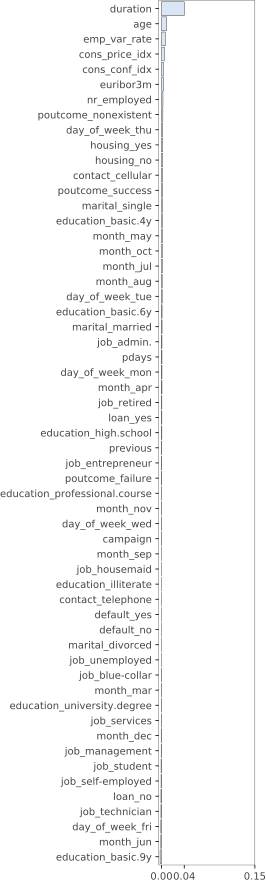

In [348]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train.values.ravel())
importance = rfpimp.importances(rfc, X_test, y_test)
rfpimp.plot_importances(importance)

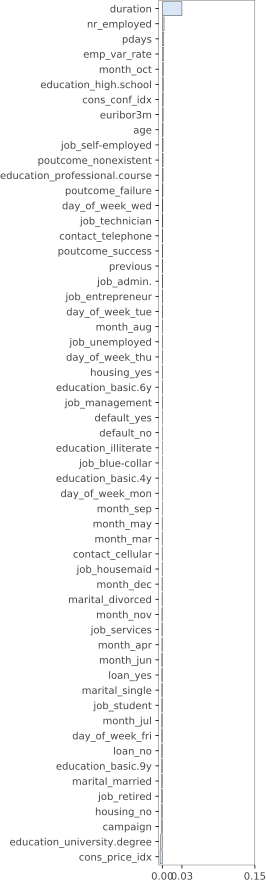

In [349]:
model=DecisionTreeClassifier(max_depth=7)
rfc.fit(X_train, y_train.values.ravel())
importance = rfpimp.importances(rfc, X_test, y_test)
rfpimp.plot_importances(importance)

# Predicting Output of the Train Dataset to calculate model error


In [350]:
train_predict = rfc.predict(X_test)

In [351]:
mean_squared_error(y_test, train_predict)

0.08776910338301395

In [352]:
for col in categorical_columns:
    df_test[col] = df_test[col].astype('category')

In [365]:
df_test_categorized = pd.get_dummies(df_test)
df_test_categorized = df_test_categorized.drop("y_no", axis=1)
df_test_categorized

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_yes
28544,34,129,2,999,0,-1.8,92.893,-46.2,1.344,5099.1,...,0,0,0,0,1,0,0,1,0,0
32667,39,272,1,999,0,-1.8,92.893,-46.2,1.250,5099.1,...,0,1,0,0,0,0,0,1,0,0
19210,49,96,2,999,0,1.4,93.444,-36.1,4.964,5228.1,...,0,0,0,1,0,0,0,1,0,0
33981,43,146,2,999,0,-2.9,92.963,-40.8,1.262,5076.2,...,0,0,0,0,1,0,0,1,0,0
20649,34,239,3,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5800,24,112,4,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,0,0,1,0,0
10243,42,143,1,999,0,1.4,94.465,-41.8,4.961,5228.1,...,0,0,0,1,0,0,0,1,0,0
18247,45,111,1,999,0,1.4,93.444,-36.1,4.966,5228.1,...,0,1,0,0,0,0,0,1,0,0
15984,47,330,4,999,0,1.4,93.918,-42.7,4.962,5228.1,...,0,0,1,0,0,0,0,1,0,0


In [366]:
feature_diff = set(X_train) - set(df_test_categorized)
feature_diff

{'default_yes'}